# Introductory applied machine learning (INFR10069)

# Assignment 1: Data analysis and visualisation

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation: **in questions where this is specified, you will be penalised if you go over.**

1. Make sure to distinguish between **attributes** (columns of the data) and **features** (which typically refers only to the independent variables, i.e. excluding the target variables).

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you must NOT borrow actual text or code from others. We ask that you provide a list of the people who you've had discussions with (if any). Please refer to the [Academic Misconduct](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct) page for what consistutes a breach of the above.

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 18/10/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

All submissions happen electronically. To submit:

1. Fill out this notebook, and save it, making sure to **KEEP the name of the file UNCHANGED**.

1. On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

  ```submit iaml cw1 "01_Analysis.ipynb"```

  What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.
  
1. **Distance Learners:** To copy your work onto DICE (so that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example (replace entries in `[square brackets]` with your specific details):
```
filename="01_Analysis.ipynb"
local_scp_filepath=[DIRECTORY CONTAINING GIT REPOSITORY]${filename}
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
ssh [YOUR USERNAME]@${server_address}
ssh student.login
submit iaml cw1 "01_Analysis.ipynb"
```

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [2]:
%matplotlib inline

import os
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

sys.path.append('..')
from utils.plotter import scatter_jitter, plot_confusion_matrix

C:\Users\RHughes\AppData\Local\conda\conda\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


## Description of the dataset

This assignment is based on the 20 Newsgroups Dataset. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

There are three versions of the 20 Newsgroups Dataset. In this assignment we will use the `bydate` matlab version in which documents are sorted by date into training (60%) and test (40%) sets, newsgroup-identifying headers are dropped and duplicates are removed. This collection comprises roughly 61,000 different words, which results in a bag-of-words representation with frequency counts. More specifically, each document is represented by a 61,000 dimensional vector that contains the counts for each of the 61,000 different words present in the respective document. 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. The class is conveniently stored in the `class` column. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related. Additionally, we computed the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) of each word with the class attribute and selected the some words out of 61,000 that had highest mutual information. For very sophisticated technical reasons (which you should know!) 1 was added to all the word counts in part 1. The resulting representation is much more compact and can be used directly to perform our experiments in Python.

**Hint**: The data was preprocessed by a very busy PhD student... and hence should never be taken to be perfect at face value!

## 1. Exploration of the dataset

Your first task is to get a feel for the data that you will be dealing with in the rest of the assignment.

### ========== Question 1.1 --- [10 marks] ==========

1. [Code] Load the dataset `raw_20news.csv` into a data-frame called `news_raw`. Using pandas methods we learnt in class, extract some basic information about the data. 

1. [Text] In a short paragraph, summarise the key features of the dataset. *Hint: Look at what we did in the labs.*

In [3]:
news_raw = pd.read_csv('datasets/raw_20news.csv')
display(news_raw.head(5))
display(news_raw.tail(5))
display(news_raw.info())
display(news_raw.describe())


,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
0,1,1,1,1,1,1,1,1,1,1,...,1,5,3,6,8,4,6,4,8,4
1,1,1,1,1,1,1,1,1,1,1,...,2,3,6,8,3,4,5,6,5,4
2,1,1,1,1,1,1,1,1,1,2,...,4,2,6,5,2,5,5,7,8,2
3,1,1,1,1,1,1,1,1,1,1,...,6,3,6,1,1,8,1,8,4,3
4,1,1,1,1,1,1,1,1,1,1,...,6,1,7,8,6,3,1,8,4,3


,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
2252,1,1,1,1,1,1,1,1,1,1,...,1,8,2,1,8,4,5,4,1,3
2253,1,1,1,1,1,1,1,1,1,1,...,1,2,5,3,7,4,5,2,7,2
2254,1,1,1,1,1,1,1,1,1,1,...,2,4,1,2,1,2,3,7,5,5
2255,1,1,1,1,1,1,1,1,1,2,...,7,3,8,8,2,2,7,8,7,4
2256,1,1,1,1,1,1,1,1,1,1,...,5,7,5,2,3,4,5,1,2,3


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2129 entries, 0 to 2256
Columns: 521 entries, w1_aaa to class
dtypes: int64(521)
memory usage: 8.5 MB


None

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.00000,2129.000000,2129.000000,2129.000000,2129.000000,...,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000
mean,5.128229,6.097698,6.120244,5.551902,5.521841,6.12776,5.633161,6.090653,5.970409,5.624706,...,9.666510,9.217473,9.061531,9.398309,9.175200,9.708783,8.807891,9.719587,9.307656,3.092532
std,38.292577,46.190953,46.656022,40.953913,40.978098,45.96434,41.146918,45.762060,44.266628,40.769105,...,45.844064,43.948910,40.969185,43.833064,42.403283,47.294120,39.341038,46.185082,45.059367,1.395948
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,4.000000
max,572.000000,583.000000,579.000000,580.000000,591.000000,600.00000,546.000000,591.000000,578.000000,578.000000,...,590.000000,587.000000,577.000000,598.000000,568.000000,599.000000,585.000000,600.000000,597.000000,5.000000


(2) The dataset comprises 520 columns, each representing features of the data with one columns for the class label. There are 2129 data points. The total size of the data is 8.5MB. Each feature represents the word count for a word in that particular document. 1 has been added to each data point.

### ========== Question 1.2 ---  [6 marks] ==========
1. [Code] Display the names of some of the attributes in the training datset. 
1. [Text] Describe the output and comment (1 or 2 sentences) keeping in mind the selection procedure for the features.

In [4]:
for x in range(0,15): print(news_raw.columns[x])

w1_aaa
w2_pins
w3_kmr
w4_notion
w5_queens
w6_dwyer
w7_defenseman
w8_gld
w9_tocchet
w10_home
w11_buying
w12_internet
w13_slots
w14_compatible
w15_transfer


(2) The output is some of the attribute names in the dataset. They look like words with an assigned prefix denoted by 'w' followed by a number and an underscore. We notice that the high *mutual information* criteria has likely given us attributes that would be common to multiple classes. Given the natural overlap of both of the *sport* classes we see attributes such as "w7_defenseman" that could belong to both sport classes.

### ========== Question 1.3 --- [4 marks] ==========
Familiarise yourself with the [`stripplot`](https://seaborn.github.io/generated/seaborn.stripplot.html?highlight=stripplot#seaborn.stripplot) function in `seaborn`. 

1. [Code] Pick one attribute of your choice (except `class`) and display a stripplot for that attribute for the raw dataset. Demonstrate the distribution of the data separately for each class (by making appropriate use of the `x` argument in `stripplot`). Set the `jitter` argument to `True` and the `alpha` argument to an appropriate value (to add transparency to better visualise your model). When the jitter parameter is enabled a small amount of noise is added to the data so that there is less overlap and the distribution is easier to visualise. 
 ***N.B.*** *If for some reason, the alpha parameter does not work for you, then ignore it.*

1. [Text] Mention anything peculiar you observe in the Data.

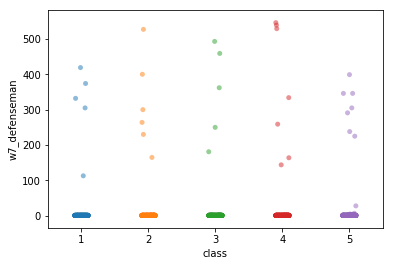

In [5]:
my_attribute = news_raw['w7_defenseman']

sns.stripplot(news_raw['class'],my_attribute,jitter=True,alpha=0.5)

(2) It looks like for the vast majority of datapoints this word is very infrequent.  However, there are huge counts for a very small number of data points. 

### ========== Question 1.4  --- [8 marks] ==========
Let us analyse this further. The stripplot illustrates the distribution of a single attribute. We can also visualise the joint distribution of two variables by using a scatter plot. Again, we want to add a bit of jitter into the data so that is easier to see which parts of the space (2-dimensional in our case) have larger probability densities. For this, you will be using the function `scatter_jitter` from the `utils` library which we provided. This function takes as input two numpy arrays containing the features of interest. 

1. [Code] First, pick two attributes of your choice from `news_raw` and use the provided function to plot their joint distribution. Do this twice (i.e. pick 4 attributes and do plots between two pairs: you do not need to plot between each possible pair). You can play around with the amount of noise added by tweaking the `jitter` parameter. Alternatively, you can just use its default value which is set to 0.2. Label the axes appropriately.

1. [Text] Do these plots increase or reduce the possibility of the data-set containing outliers? Why or why not? How would you visualise the data to verify this? **N.B. There is no need to code anything for this part, just indicate a reasonable type of plot, and what you expect to see.**

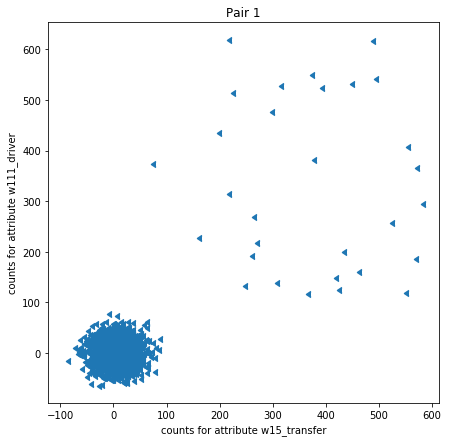

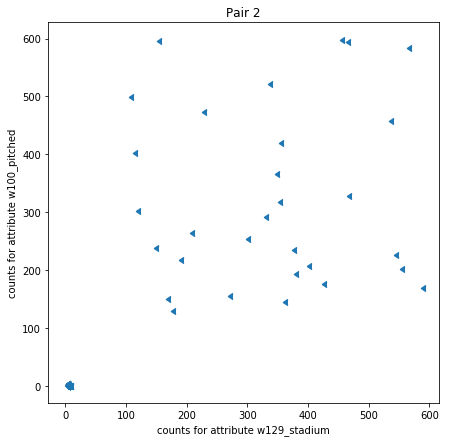

In [32]:
a1 = news_raw['w15_transfer']
a2 = news_raw['w111_driver']

a3 = news_raw['w129_stadium']
a4 = news_raw['w100_pitched']



def plot_4_datasets(array_1,array_2,array_3,array_4,jitter1,jitter2):
    prefix = 'counts for attribute '
    # Pair 1
    plt.figure(figsize=(7,7))
    scatter_jitter(array_1,array_2,jitter1)
    plt.title('Pair 1')
    plt.xlabel(prefix + array_1.name)
    plt.ylabel(prefix + array_2.name)
    plt.show()
    
    # Pair 2
    plt.figure(figsize=(7,7))
    scatter_jitter(array_3,array_4,jitter2)
    plt.title('Pair 2')
    plt.xlabel(prefix + array_3.name)
    plt.ylabel(prefix + array_4.name)
    plt.show()
    
plot_4_datasets(a1,a2,a3,a4,0.5,0.0)

(2) These plots increase the chance that there are potential outliers in the data. For 2 scatterplots between 4 arbitrarily selected attributes there is a similar distribution where most of the data is grouped together and a handful of other points are much further away from the rest. In my opinion this is a pretty good visualisation to highlight outliers as a few isolated instances are very unlike the rest of the data. Note that the second plot has *no* jitter which allows us to see that what is likely the true data is very closely grouped. 

### ========== Question 1.5 --- [15 marks] ==========
We want to get rid of the potential outliers in the data. Your job now is to create a new dataset from `news_raw` (name it `news_clean`) and remove the outliers.

1. [Text] Decide on a criterion to find the outliers and argue why it is reasonable. 
1. [Code] Then implement it and visualise the result (in terms of your criterion). **Be careful** not to alter the original dataset as we will need it later. 
1. [Text] Finally report the number of documents in the cleaned dataset, and the number rejected as outliers and comment on the result

(1) Based on the plot *Pair 2* in Question 1.4.1 we see that most data is very closely grouped around a small area. Combined with the sampled standard deviations displayed in Question 1.1.1, it seems that choosing to remove outliers further than **2 standard deviations from the mean** will give a good decision boundary. The [empirical rule](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule) suggests that this should encompass 95% of the data. Ballparking that there are around 30 outlier points, this suggests that around 30/2129 = 1.4% of the data are outliers, so 2 sigma seems reasonable. Note that the outliers in this case seem to be anomolies rather than real data, so we will only drop the data (as they contain very high word count for many words at once) if the number of attributes that lie outwith the boundary exceed a threshold value (50 values outwith threshold).

Number of points in clean data: 2099
Number of rows dropped: 30


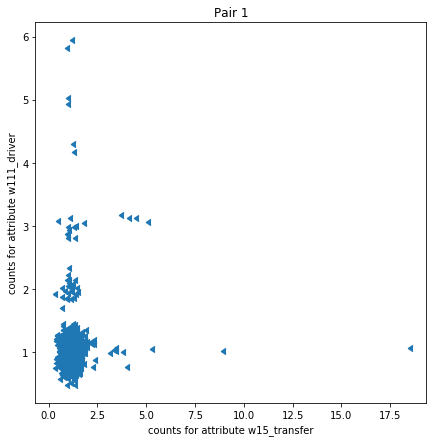

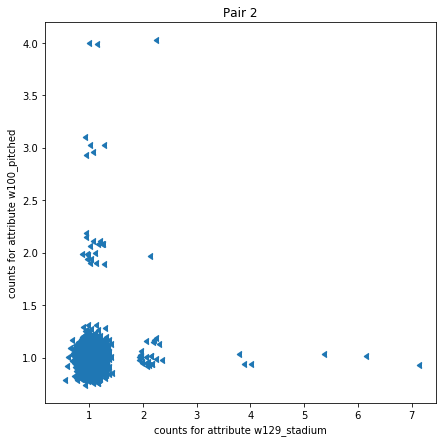

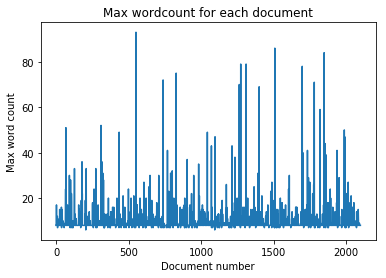

In [189]:
# create a new dataframe removing the 'class' attribute just now
news_clean = news_raw.copy().drop(columns='class')

# We'll also make a dirty dataset
news_dirty = news_clean[abs(news_clean-news_clean.mean())>2*news_clean.std()]

# this line indexes the data to return NaN for all elements that are less than the absolute difference from the mean.
news_clean = news_clean[abs(news_clean-news_clean.mean())<2*news_clean.std()]


# this line drops any data points that has a threshold of NaN values
news_clean = news_clean.dropna(thresh=50)
news_dirty = news_dirty.dropna(thresh=50)


# add back in the class labels
news_clean['class'] = news_raw['class'].copy()
news_dirty['class'] = news_raw['class'].copy()

# Calculate the statistics for the new cleaned data
num_dropped_rows = news_raw.shape[0]-news_clean.shape[0]
print('Number of points in clean data: ' +str(news_clean.shape[0]))
print('Number of rows dropped: ' +str(num_dropped_rows))


""" let's look at equivalent plots to the uncleaned data """  

b1 = news_clean['w15_transfer']
b2 = news_clean['w111_driver']

b3 = news_clean['w129_stadium']
b4 = news_clean['w100_pitched']


plot_4_datasets(b1,b2,b3,b4,0.5,0.5)

# Plot to show the new maximum count for each document
plt.plot(news_clean.drop(columns='class').max(axis=1).values)
plt.title('Max wordcount for each document')
plt.xlabel('Document number')
plt.ylabel('Max word count')
plt.show()


(3) As printed from the cell above there are now 2099 data points and 30 were rejected as outliers. You can see that the equivalent plots from before are now much clearer and start to allow room to perform meaningful analysis. As a "sanity check" 30 seems an appropriate number based on roughly how many outliers there were in the sample plots. Note that as the plots above only give data for 4 of the selected categories these do not necessarily ensure that there are no outliers left in the data. For this reason, the third plot was added to show that the maximum word count for words in each document was not unreasonably high.

### ========== Question 1.6 --- (LEVEL 11) --- [10 marks] ==========

1. [Code] Visualise some of the outlier documents and some of the inlier ones. 
1. [Text] Comment on the observations. Also comment on whether it is appropriate to do such cleaning on just the training data or on the entire data-set (including testing).

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
159,211.0,561.0,565.0,277.0,181.0,418.0,165.0,216.0,528.0,331.0,...,536.0,540.0,177.0,216.0,526.0,218.0,459.0,356.0,284.0,2.0
196,207.0,115.0,166.0,455.0,365.0,436.0,305.0,536.0,232.0,274.0,...,248.0,318.0,235.0,335.0,377.0,231.0,225.0,458.0,251.0,5.0
222,428.0,227.0,245.0,463.0,426.0,468.0,164.0,510.0,315.0,154.0,...,161.0,240.0,203.0,163.0,436.0,410.0,289.0,380.0,576.0,4.0


,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,3.0,6.0,8.0,3.0,4.0,5.0,6.0,5.0,4
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,4.0,2.0,6.0,5.0,2.0,5.0,5.0,7.0,8.0,2
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,6.0,3.0,6.0,1.0,1.0,8.0,1.0,8.0,4.0,3


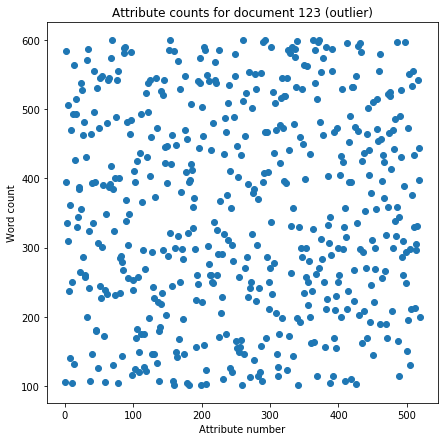

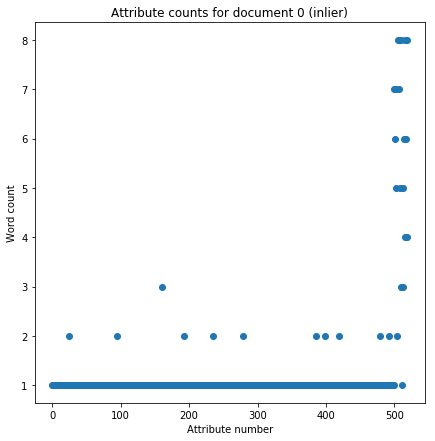

In [39]:
# Get the rows that are not in the clean data but are in the raw data
dropped_data = news_raw[~news_raw.isin(news_clean)].dropna()
dropped_no_class = dropped_data.drop(columns='class').copy()
clean_no_class = news_clean.drop(columns='class').copy()

# Visualise as text
display(dropped_data.iloc[1:4])
display(news_clean.iloc[1:4])

x_outlier = dropped_no_class.iloc[0]
x_inlier = clean_no_class.iloc[0]

# Attribute count for outlier document
plt.figure(figsize=(7,7))
plt.scatter(np.arange(0,520),x_outlier)
plt.title('Attribute counts for document ' +str(x_outlier.name) + ' (outlier)')
plt.xlabel('Attribute number')
plt.ylabel('Word count')
plt.show()

# Attribute count for inlier document
plt.figure(figsize=(7,7))
plt.scatter(np.arange(0,520),x_inlier)
plt.title('Attribute counts for document ' +str(x_inlier.name)+ ' (inlier)')
plt.xlabel('Attribute number')
plt.ylabel('Word count')
plt.show()

(2) As you can see in the two plots of Question 1.6.1, the outlier plot has very high counts for most words, which is almost certainly incorrect. The inlier plot is much more reasonable with a few counts for most counts and slightly higher count for some others. This kind of cleaning is certainly appropriate to do on the training set, as it helps us create a model that represents meaningful documents. Doing this on the testing set is a worthwhile exercise as well. Including this kind of outlier data in the testing set will likely confuse the classifier and so give results that are at best meaningless and at worse misleading. It broaches the question of what these outlier documents actually look like. If they are literally just jumbles of words then why would you want to classify them in the first place?

## 2. Naive Bayes classification
Now we want to fit a Gaussian Naive Bayes model to the cleaned dataset. You might want first to familiarise yourself with the [`GaussianNB`](http://scikit-learn.org/0.19/modules/generated/sklearn.naive_bayes.GaussianNB.html) class in `Sklearn`.

### ========== Question 2.1 --- [6 marks] ==========

Load the cleaned datasets `train_20news.csv` and `test_20news.csv` into pandas dataframes `news_train` and `news_test` respectively. Using pandas summary methods, confirm that the data is similar in both sets.

In [41]:
news_train = pd.read_csv('datasets/train_20news.csv')
news_test = pd.read_csv('datasets/test_20news.csv')

display(news_train.describe())
display(news_test.describe())

display(news_train.head())
display(news_test.head())

display(news_train.info())
display(news_test.info())

""" The data has the same number of features, most of which look to be of the same order of magnitude with similar means. 
This confirms for me that the data is similar """

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,...,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000
mean,1.025727,1.017627,1.014769,1.008576,1.006193,1.010481,1.026203,1.024297,1.012387,1.084326,...,4.574083,4.464983,4.533111,4.557885,4.531682,4.514531,4.509290,4.521201,4.412577,3.091472
std,0.280109,0.205208,0.172657,0.115206,0.078473,0.134174,0.618880,0.274219,0.153879,0.491139,...,2.283028,2.273922,2.329654,2.292246,2.333558,2.259005,2.287548,2.295995,2.296504,1.395628
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,6.000000,7.000000,7.000000,7.000000,6.000000,7.000000,6.500000,6.000000,4.000000
max,8.000000,7.000000,5.000000,4.000000,2.000000,4.000000,28.000000,5.000000,4.000000,16.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,5.000000


,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,128.000000,128.000000,128.0,128.0,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.00000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,1.007812,1.031250,1.0,1.0,1.007812,1.015625,1.007812,1.039062,1.015625,1.085938,...,4.757812,4.351562,4.593750,4.445312,4.53125,4.453125,4.687500,4.421875,4.531250,3.078125
std,0.088388,0.278847,0.0,0.0,0.088388,0.124507,0.088388,0.291678,0.124507,0.281373,...,2.201453,2.175706,2.438011,2.387001,2.31373,2.383868,2.390104,2.285212,2.370878,1.400840
min,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,3.000000,2.000000,2.000000,2.75000,2.000000,2.750000,2.000000,2.000000,2.000000
50%,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,4.000000,4.00000,5.000000,5.000000,4.000000,5.000000,3.000000
75%,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,6.000000,7.000000,7.000000,6.25000,7.000000,7.000000,6.000000,7.000000,4.000000
max,2.000000,4.000000,1.0,1.0,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,...,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,5.000000


,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
0,1,1,1,1,1,1,1,1,1,1,...,1,5,3,6,8,4,6,4,8,4
1,1,1,1,1,1,1,1,1,1,1,...,2,3,6,8,3,4,5,6,5,4
2,1,1,1,1,1,1,1,1,1,2,...,4,2,6,5,2,5,5,7,8,2
3,1,1,1,1,1,1,1,1,1,1,...,6,3,6,1,1,8,1,8,4,3
4,1,1,1,1,1,1,1,1,1,1,...,6,1,7,8,6,3,1,8,4,3


,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
1910,1,1,1,1,1,2,1,1,1,1,...,5,5,2,8,2,4,7,2,8,1
1911,1,1,1,1,1,1,1,1,1,1,...,3,4,6,8,8,8,1,2,2,5
1912,1,1,1,1,1,1,1,1,1,1,...,6,3,6,7,2,6,6,7,3,3
1913,1,1,1,1,1,1,1,1,1,1,...,8,3,4,8,8,2,6,5,5,1
1914,1,1,1,1,1,1,1,1,1,1,...,3,1,2,8,5,5,8,7,5,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099 entries, 0 to 2098
Columns: 521 entries, w1_aaa to class
dtypes: int64(521)
memory usage: 8.3 MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 1910 to 2037
Columns: 521 entries, w1_aaa to class
dtypes: int64(521)
memory usage: 522.0 KB


None

' The data has the same number of features, most of which look to be of the same order of magnitude with similar means. \nThis confirms for me that the data is similar '

### ========== Question 2.2 --- [4 marks] ==========

[Text] Answer (in brief) the following two questions:
1. What is the assumption behing the Naive Bayes Model?
1. What would be the main issue we would have to face if we didn't make this assumption?

(1/2) The main assumption behind the Naive Bayes Model is that given the class, the features are independent of each other. 
(2/2) If we didn't make this assumption then we would have to compute the joint probability for every possible set of features. In the example above this would mean computing the different permutations of all 520 different classes. Which would not only be computationally intractable, but would also require far more data.

### ========== Question 2.3 --- [8 marks] ==========

1. [Code] By using the `scatter_jitter` function, display a scatter plot of the features `w281_ico` and `w273_tek` for the **cleaned** dataset `news_train`. Set the jitter value to an appropriate value for visualisation. Label axes appropriately.
1. [Text] What do you observe about these two features? Does this impact the validity of the Naive Bayes assumption? Why or why not?

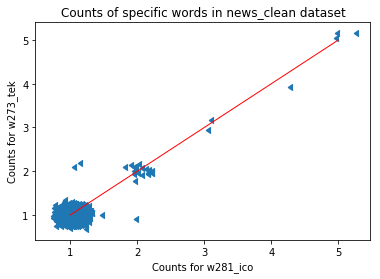

In [42]:
x_var = news_train['w281_ico'].drop(columns='class')
y_var = news_train['w273_tek'].drop(columns='class')

scatter_jitter(x_var,y_var,0.5)
plt.title('Counts of specific words in news_clean dataset')
prefix = 'Counts for '
plt.xlabel(prefix + x_var.name)
plt.ylabel(prefix + y_var.name)

plt.plot([1, 5], [1, 5], color='r', linestyle='-', linewidth=1)

(2) Yes it certainly does. As indicated by the red line in the plot above there is a **positive correlation** between these two attributes. Therefore seeing higher counts of one variable makes it more likely that there will also be higher counts of another variable. So they are **not independent** this makes the key assumption of the Naive Bayes Model **less valid**.

### ========== Question 2.4 --- [7 marks] ==========
1. [Text] What is a reasonable baseline against which to compare the classiffication performance? *Hint: What is the simplest classiffier you can think of?*. 
1. [Code] Estimate the baseline performance on the *training* data in terms of classification accuracy.

(1) A reasonable classifier might be to just say that the class for every document is the class of the most frequently observed class in the training data. Assuming that one class is seen more often than the others this should do better than a random selection.

Baseline classification accuracy on training set: 0.2130


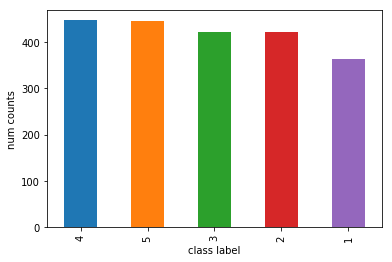

In [171]:
class Baseline(object):
    """ A class to model the dumb baseline classifier """
    
    most_likely_class = None
    class_probs = []
    
    def fit(self, y_train):
        """ Fit the training data to train the baseline model"""
        
        # Get the number of counts of each class 
        instance_counts = y_train.value_counts()
        
        # Get the probability of each class being selected
        self.class_probs = instance_counts/instance_counts.sum()
        
        # Get the index of the most likely class
        most_likely_class_index = np.argmax(self.class_probs.values)
        
        # Get the name of the most likely class (must be numeric)
        self.most_likely_class = self.class_probs.keys()[most_likely_class_index]
        
    def predict(self, x):
        """ Return a prediction array using the most likely class.
            The size of the array is the same as the number of samples
            in the x variable"""
        
        y = np.ones([len(x),])*self.most_likely_class
        return y
    
    def score(self, y_true,y_predict):
        """ Compute accuracy based on the true values"""
        
        truth_array = (y_true-y_predict == 0).value_counts()
        score = truth_array[True]/(truth_array[True]+truth_array[False])
        return score


y_train =  news_train['class']
x_train =  news_train.drop(columns='class')

# Train and score the baseline
bl = Baseline()
bl.fit(y_train)
y_predict_baseline = bl.predict(x_train)
bl_score = bl.score(y_train, y_predict_baseline)

print('Baseline classification accuracy on training set: {0:.4f}'.format(bl_score))

y_train.value_counts().plot(kind='bar')
plt.xlabel('class label')
plt.ylabel('num counts')
plt.show()

<a id='question_2_5'></a>
### ========== Question 2.5 --- [12 marks] ==========

1. [Code] Fit a Gaussian Naive Bayes model to the cleaned dataset. 

1. [Code] Report the classification accuracy on the **training** dataset and plot a Confusion Matrix for the result (labelling the axes appropriately).

1. [Text] Comment on the performance of the model. Is the accuracy a reasonable metric to use for this dataset?

*Hint: You may make use of utility functions we provided, as well as an sklearn method for computing confusion matrices*

In [173]:
NBclassifier = sklearn.naive_bayes.GaussianNB(bl.class_probs.values)

# Get the train and test data from the cleaned dataset
x_train = news_train.drop(columns='class')
y_train = news_train['class']

# Fit these parameters to the model
NBclassifier.fit(x_train,y_train)

GaussianNB(priors=array([0.21296, 0.21248, 0.20105, 0.20057, 0.17294]))

Training set classification accuracy is: 0.8780


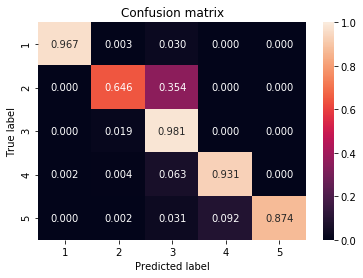

In [174]:
# Predict outputs based on the training data
y_predict_train = NBclassifier.predict(x_train)

# Calculate a confusion matrix
cfn_matrix = sklearn.metrics.confusion_matrix(y_train,y_predict_train)

# Plot the confusion matrix
plot_confusion_matrix(cfn_matrix,[1,2,3,4,5])

#Classification accuracy
print('Training set classification accuracy is: {0:.4f}'.format(NBclassifier.score(x_train, y_train)))

(3) It appears that for this dataset Naive Bayes is reasonably good. It's interesting to note that the area that it struggled with most was discerning the difference between the ibm.pc.hardware and mac.hardware classes likely because these use much of the similar language. I think that the accuracy of classification is a reasonable metric for this dataset. It could be improved by perhaps some metric of how close the classifier got to the correct class via some kind of clustering metric. This would show for example that even though the classifier only got ~64% of the class 2 predictions correct, the ones that it didn't get were likely very close to being correct but were instead moved to class 3. It might even be difficult for humans to discern whether an article is describing mac or pc hardware depending on the technical level of the language. 

### ========== Question 2.6 --- [3 marks] ==========

[Text] Comment on the confusion matrix from the previous question. Does it look like what you would have expected? Explain.

Yes, it largely looks as I would have expected. As I mentioned in the previous answer, there does seem to be some confusion between classes 2 and 3, likely due to the similar nature of the language that was likely present in those documents. However, another point to note is that although there are some instances of class 3 (mac) that are classified as class 2 (pc), there are very few cases of class 2 predicted where it was actually class 3. This suggests that language about class 3, makes it quite explicit that it's about mac, whereas language about class 2, is more subtle as to whether it refers to pc or mac. The classification for all other classes is comparitively higher.

### ========== Question 2.7 --- [12 marks] ==========

Now we want to evaluate the generalisation of the classifier on new (i.e. unseen data). 

1. [Code] Use the classifier you trained in Question [2.5](#question_2_5) (i.e. on the cleaned dataset) and test its performance on the test dataset. Display classification accuracy and plot a confusion matrix of the performance on the test data. 

1. [Code] Also, reevaluate the performance of the baseline on the test data.

1. [Text] In a short paragraph (3-4 sentences) compare and comment on the results with (a) the training data and (b) the baseline (on the test data).

Test set classification accuracy is: 0.8203


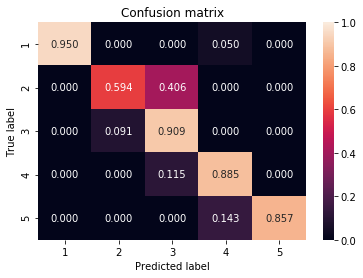

In [165]:
x_test = news_test.drop(columns='class')
y_test = news_test['class']

y_predict_test = NBclassifier.predict(x_test)

# Calculate a confusion matrix
cfn_matrix = sklearn.metrics.confusion_matrix(y_test,y_predict_test)

# Plot the confusion matrix
plot_confusion_matrix(cfn_matrix,[1,2,3,4,5])

#Show classification accuracy
print('Test set classification accuracy is: {0:.4f}'.format(NBclassifier.score(x_test, y_test)))

In [169]:
y_predict_baseline_test = bl.predict(x_test)
bl_score_test = bl.score(y_test, y_predict_baseline_test)

print('Baseline classification accuracy on test set: {0:.4f}'.format(bl_score_test))

Baseline classification accuracy on test set: 0.2031


For the test data we see slightly reduced performance with a slightly higher percentage of mis-classified labels but overall still better classification than the baseline approach whic is marginally worse on the test set too.  The biggest flaw from the training data Naive Bayes analysis was the mis-classification between classes 2 and 3 and this is even more true for the test data case, with a roughly 60/40 split in classification between classes 2 and 3 when the true class label was 2. 

### ========== Question 2.8 --- (LEVEL 11) --- [7 marks] ==========
1. [Code] Fit a Gaussian Naive Bayes model to the original raw dataset (including the outliers) and test its performance on the **test** set. 

1. [Text] Comment on the output and explain why or why not cleaning affects the classifier.

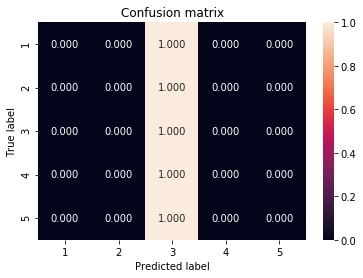

In [192]:
x_train_raw = news_raw.drop(columns='class')
y_train_raw = news_raw['class']

# We need to calculate the priors for input to the classifier
instance_counts = y_train_raw.value_counts()
class_probs = instance_counts/instance_counts.sum()

# Create the prior list 
prior_list = []
for x in range(1,6):
    prior_list.append(class_probs[x])

NBclassifier_raw = sklearn.naive_bayes.GaussianNB(prior_list)

NBclassifier_raw.fit(x_train_raw,y_train_raw)

y_predict_raw = NBclassifier_raw.predict(x_test)

# Calculate a confusion matrix
cfn_matrix = sklearn.metrics.confusion_matrix(y_test,y_predict_raw)

# Plot the confusion matrix
plot_confusion_matrix(cfn_matrix,[1,2,3,4,5])



(2) Clearly the output is not correct and we have trained a poor model. Because of the magnitude of the outlier data, the classifier has not been able to correctly interpret the cleaned training data. The outliers have skewed the model as they were labelled in the same way as the actual data, but were in fact completely dissimilar. Cleaning has made considerable improvements to the model as it has removed the data that doesn't look anything like our class

### ========== Question 2.9 --- (LEVEL 11) --- [3 marks] ==========

In this exercise we have fitted a Gaussian Naive Bayes classifier to the data (i.e. the class conditional densities are Gaussians). However, this is not ideally suited to our dataset. Can you explain why this is so? what kind of Naive Bayes model would you employ to this kind of data?

The Gaussian Naive Bayes classifier is not suited as the data is not normally distributed. Most values are 1.0 while only a few are any larger than this, so the distribution is heavily skewed towards 1.0. A more suitable alternative would be to use a Multinomial Naive Bayes classifier where we would use a smoothed version of maximum likelihood to make our feature vectors represent the relative frequency of words in the document. This does not rely on the data being normally distributed.